<Axes: xlabel='Month'>

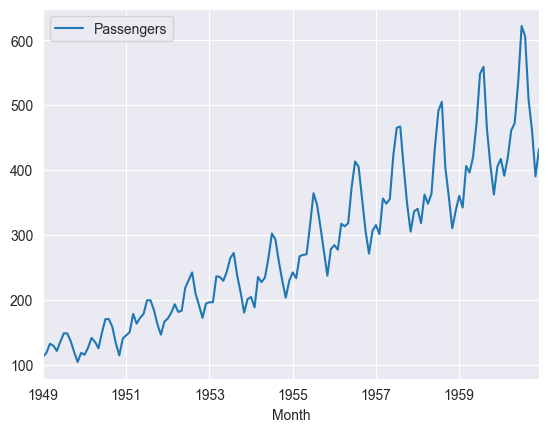

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as sps

passangers = pd.read_csv("./passengers.csv")
passangers.head()

passangers.set_index('Month', inplace=True)
passangers.index = pd.to_datetime(passangers.index)
passangers.plot()

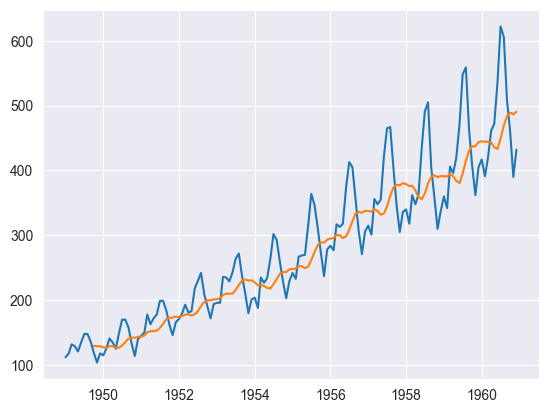

In [3]:
plt.plot(passangers)
plt.plot(passangers.rolling(10).mean())
plt.show()

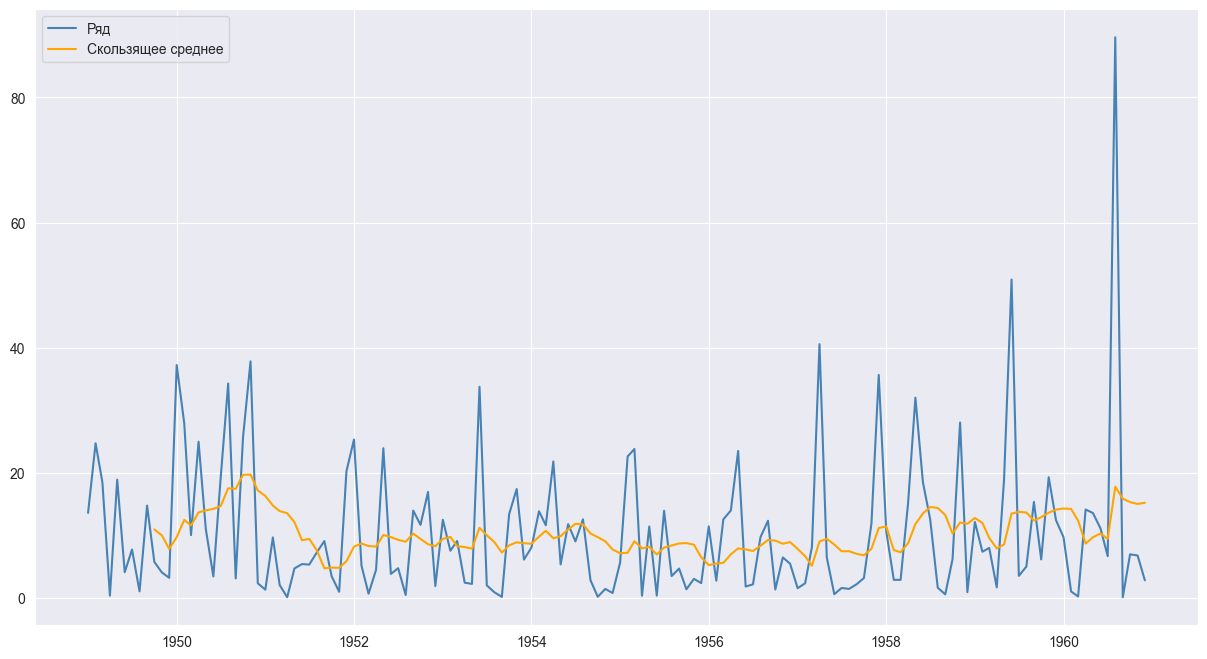

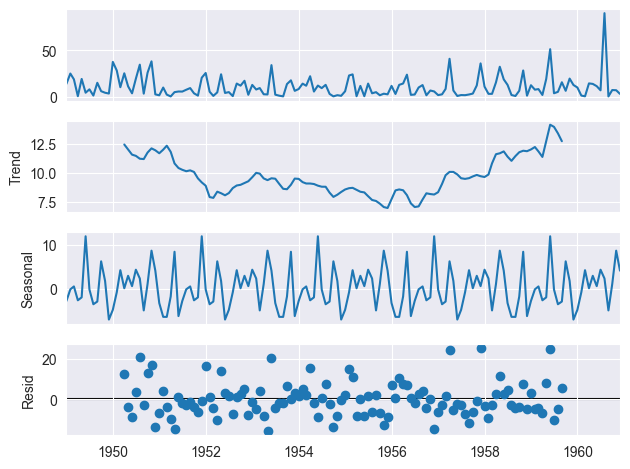

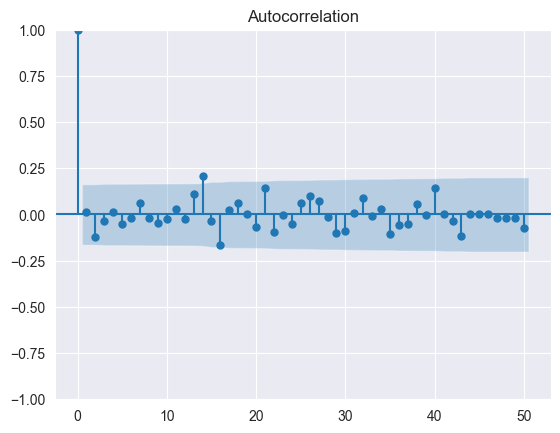

In [4]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as ms

# Загружаем данные
daily_dates = pd.read_csv('passengers.csv')

# Преобразуем дату в datetime и установим как индекс
# Предполагая, что в CSV есть колонка с датой (например, 'date')
daily_dates['Month'] = pd.to_datetime(daily_dates['Month'])
daily_dates.set_index('Month', inplace=True)

N = len(daily_dates)
trow = sps.expon(scale=10).rvs(size=N)

plt.figure(figsize=(15, 8))
trow = pd.Series(trow)

# Используем индекс из daily_dates для trow
trow.index = daily_dates.index  # Исправлено: используем индекс, а не весь DataFrame

# Поочередно зададим кривые с подписями и цветом
plt.plot(trow, label='Ряд', color='steelblue')
plt.plot(trow.rolling(window=10).mean(), label='Скользящее среднее', color='orange')
plt.legend()
plt.show()

# Применяем функцию сезонной декомпозиции
decompose = ms.tsa.seasonal_decompose(trow, model='additive', period=30)  # period можно настроить
decompose.plot()
plt.show()

# Автокорреляционная функция
plot_acf(trow, lags=50)
plt.show()

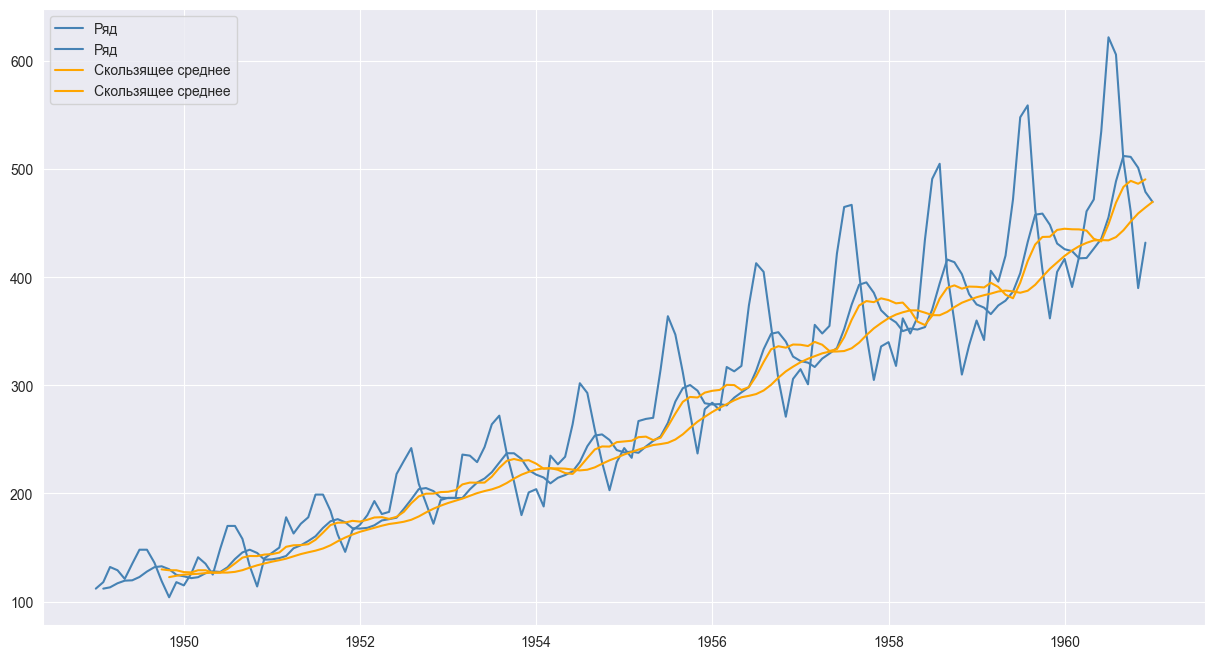

In [8]:
alpha = 0.2

# первое значение совпадает со значением временного ряда
exp_smoothing = [passangers['Passengers'].iloc[0]]

# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(passangers['Passengers'])):
  exp_smoothing.append(alpha * passangers['Passengers'].iloc[i] + (1 - alpha) * exp_smoothing[i - 1])

passangers['Plan']=exp_smoothing

last_date = passangers.iloc[[-1]].index
last_date = last_date + dt.timedelta(days=30)

passengers = pd.concat([passangers,pd.DataFrame(index = last_date)])
passengers.Plan = passengers.Plan.shift(1)

plt.figure(figsize=(15, 8))
plt.plot(passengers, label='Ряд', color='steelblue')
plt.plot(passengers.rolling(window=10).mean(), label='Скользящее среднее', color='orange')
plt.legend()
plt.show()

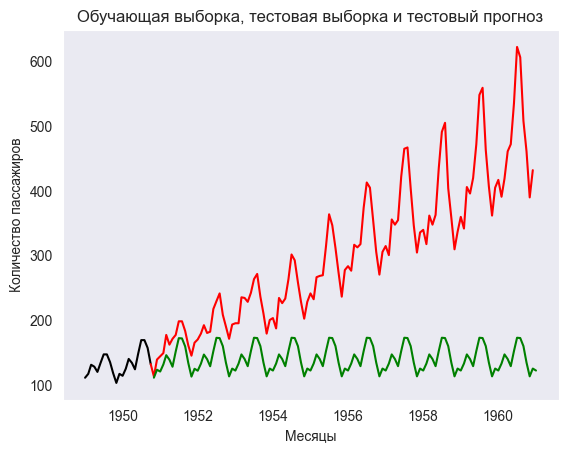

In [32]:
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

train = passangers[:'1950-10']['Passengers']
test = passangers['1950-10':'1960-12']['Passengers']
# обучим модель с соответствующими параметрами, SARIMAX(3, 0, 0)x(0, 1, 0, 12)
# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

# создадим объект этой модели
model = SARIMAX(train,
                order = (3, 0, 0),
                seasonal_order = (0, 1, 0, 12))

# применим метод .fit()
result = model.fit()


start = len(train)
# и закончится в конце тестового
end = len(train) + len(test) - 1

# применим метод .predict()
predictions = result.predict(start, end)

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")

# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()